In [54]:
import torch
import pandas as pd
import numpy as np
import string
import re
from skimage.io import imread, imshow
from skimage import color
from skimage.transform import resize
from PIL import Image, ImageOps
import torch.nn as nn
import torch.optim as optim
import os
import PIL
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
df=pd.read_csv("/content/drive/MyDrive/memotion_dataset_7k/labels.csv")


In [56]:
df['text_corrected'].fillna('',inplace=True)

In [57]:
a=df['text_corrected']
c=0
array=[]

stopwords = nltk.corpus.stopwords.words('english')
for text in df['text_corrected']:
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    c+=1
    text=punctuationfree.lower()
    text=re.split(' ',text)
    text=[i for i in text if i not in stopwords]
    ff=""
    for i in text:
        ff=ff+i+" "
    text=ff
    array.append(text)
    

In [58]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = array

def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1
newarr=[]
for i in range(len(array)):
    abc=text_pipeline(array[i])
    newarr.append(abc)



In [59]:
ad=[]

for i in range(len(newarr)):
    if(len(newarr[i])==0):
        ad.append(i)
ad.append(5118)
for i in range(len(ad)):
    newarr.remove(newarr[ad[i]])


In [60]:
df.drop(labels=ad,axis=0,inplace=True)

In [61]:
path="/content/drive/MyDrive/memotion_dataset_7k/images"
#for j in os.listdir(path):
#    print(j)
LOAD_TRUNCATED_IMAGES = True
tempimg=[]
from PIL import Image
for j in (df["image_name"]):
    im = Image.open(path+'/'+j)
    newsize = (256, 256)
    im=im.resize(newsize)
    im=ImageOps.grayscale(im)
    im=np.array(im)
    im=im.flatten()
    tempimg.append(im)


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [12]:
for i in range(len(newarr)):
    max=106
    fa=len(newarr[i])
    total=max-fa
    for j in range(total):
        newarr[i].append(0)


In [13]:
X_train=tempimg[:4886]
X_test=tempimg[4886:]
X_train1=newarr[:4886]
X_test1=newarr[4886:]
X_train1=np.array(X_train1)
X_test1=np.array(X_test1)

In [15]:
data = {'Train': X_train}
data1={"Test":X_test}
dfff=pd.DataFrame(data)
dfff1=pd.DataFrame(data1)

In [17]:
dfff1.to_csv("Test.csv",index=False)
dfff.to_csv("Train.csv",index=False)

In [20]:
df['offensive'].value_counts()
order={"not_offensive":0,"slight":1,"very_offensive":1 ,"hateful_offensive":1}
df['offensive']=df['offensive'].map(order)
Y=df['offensive']
y=[]
for i in Y:
    y.append(i)
y_train0=y[:4886]
y_test0=y[4886:]
y_train0=np.array(y_train0)
y_test0=np.array(y_test0)
y_train0


array([0, 0, 0, ..., 1, 1, 1])

In [21]:
df['humour'].value_counts()
order={"not_funny":0,"funny":1,"very_funny":1 ,"hilarious":1}
df['humour']=df['humour'].map(order)
Y=df['humour']
y=[]
for i in Y:
    y.append(i)
y_train1=y[:4886]
y_test1=y[4886:]
y_train1=np.array(y_train1)
y_test1=np.array(y_test1)
y_train1


array([1, 0, 1, ..., 1, 1, 1])

In [22]:
df['sarcasm'].value_counts()
order={"not_sarcastic":0,"general":1,"twisted_meaning":1 ,"very_twisted":1}
df['sarcasm']=df['sarcasm'].map(order)
Y=df['sarcasm']
y=[]
for i in Y:
    y.append(i)
y_train2=y[:4886]
y_test2=y[4886:]
y_train2=np.array(y_train2)
y_test2=np.array(y_test2)
y_train2


array([1, 1, 0, ..., 1, 1, 1])

In [23]:
df['motivational'].value_counts()
order={"not_motivational":0,"motivational":1}
df['motivational']=df['motivational'].map(order)
Y=df['motivational']
y=[]
for i in Y:
    y.append(i)
y_train3=y[:4886]
y_test3=y[4886:]
y_train3=np.array(y_train3)
y_test3=np.array(y_test3)
y_train3

array([0, 1, 0, ..., 0, 0, 1])

In [24]:
df['overall_sentiment'].value_counts()
order={"positive":2,"neutral":1,"very_positive":2 ,"negative":0,"very_negative":0}
df['overall_sentiment']=df['overall_sentiment'].map(order)
Y=df['overall_sentiment']
y=[]
for i in Y:
    y.append(i)
y_train=y[:4886]
y_test=y[4886:]
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train


array([2, 2, 2, ..., 2, 0, 1])

In [25]:
X_train=torch.tensor(X_train)
X_test=torch.tensor(X_test)
y_train=torch.tensor(y_train)
y_test=torch.from_numpy(y_test)
X_train1=torch.from_numpy(X_train1)
X_test1=torch.from_numpy(X_test1)
y_train
#4886
y_train0=torch.tensor(y_train0)
y_test0=torch.from_numpy(y_test0)
y_train1=torch.tensor(y_train1)
y_test1=torch.from_numpy(y_test1)
y_train2=torch.tensor(y_train2)
y_test2=torch.from_numpy(y_test2)
y_train3=torch.tensor(y_train3)
y_test3=torch.from_numpy(y_test3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  """Entry point for launching an IPython kernel.


In [28]:
def valreturner(x):
    image=X_train[x].float()
    text=X_train1[x].float()
    label=y_train[x]
    label0=y_train0[x]
    label1=y_train1[x]
    label2=y_train2[x]
    label3=y_train3[x]

    return image, text, label, label0, label1, label2, label3

In [53]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.Text = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(106, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
        )
        self.Image = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(256*256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
        )
        
        
        self.Combined_Im_Text = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 3),
        )
        self.Humor = nn.Sequential(
            nn.Linear(256, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 2),
        )
        self.Motivational = nn.Sequential(
            nn.Linear(256, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.Tanh(),

            nn.Linear(128, 2),
        )
        self.Sarcastic = nn.Sequential(

            nn.Linear(256, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 2),
        
        )
        self.Offensive = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 2),
        )

    def forward(self, image, text):
        text = self.Text(text)
        image = self.Image(image)
        combined_out = torch.cat([text,image],0)
        out = self.Combined_Im_Text(combined_out)
        out1 = self.Offensive(combined_out)
        out2 = self.Humor(combined_out)
        out3 = self.Sarcastic(combined_out)
        out4 = self.Motivational(combined_out)

        return out,out1,out2,out3,out4

In [43]:
clf = NeuralNetwork()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.08,betas=(0.9, 0.979), eps= 1e+20)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max')

In [ ]:
for epoch in range(2): 
    running_loss = 0
    correct = 0
    correct1 = 0
    correct2 = 0
    correct3 = 0
    correct4 = 0
    size=(len(X_train))
    for i in range(size):
        im, t, la, la0, la1, la2, la3 = valreturner(i)
        optimizer.zero_grad()
        output, output0, output1, output2, output3 = clf(im, t)
        if output0.argmax(0) == la0:
            correct1 += 1
        if output1.argmax(0) == la1:
            correct2 += 1
        if output2.argmax(0) == la2:
            correct3 += 1
        if output3.argmax(0) == la3:
            correct4 += 1

        loss=criterion(output0, la0)
        loss+=criterion(output1, la1)
        loss+=criterion(output2, la2)
        loss+=criterion(output3, la3)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if int(i) % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    scheduler.step(loss)
    print("Offensive Accuracy",correct1/ size)
    print("Humor Accuracy",correct2/ size)
    print("Sarcastic Accuracy",correct3/ size)
    print("Motivational Accuracy",correct4/ size)
    print("Overall Accuracy",(correct1+correct2+correct3+correct4)/(size*4))
print('Finished Training')


[1,  2000] loss: 2.763
[1,  4000] loss: 2.777
Offensive Accuracy 0.39664347114203846
Humor Accuracy 0.7642243143675809
Sarcastic Accuracy 0.7791649611133852
Motivational Accuracy 0.6504297994269341
Overall Accuracy 0.6476156365124847
[2,  2000] loss: 2.764
[2,  4000] loss: 2.777
Offensive Accuracy 0.3937781416291445
Humor Accuracy 0.7642243143675809
Sarcastic Accuracy 0.7791649611133852
Motivational Accuracy 0.6504297994269341
Overall Accuracy 0.6468993041342611
Finished Training


In [ ]:
import torch
from torch import nn
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-xz7ie89l
  Running command git clone -q https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-xz7ie89l
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4990 sha256=7f89a5c3199a128a659126d7376eb1c17fe050de38bbed34c262124e81d6e715
  Stored in directory: /tmp/pip-ephem-wheel-cache-e0pklmmz/wheels/69/06/fd/652908d49c931cdcca96be3c727fb11ed777a3a62402210396
Successfully built torchviz


In [ ]:
im, t, la, la0, la1, la2, la3 = valreturner(0)

GRAPH OF NEURAL NETWORK

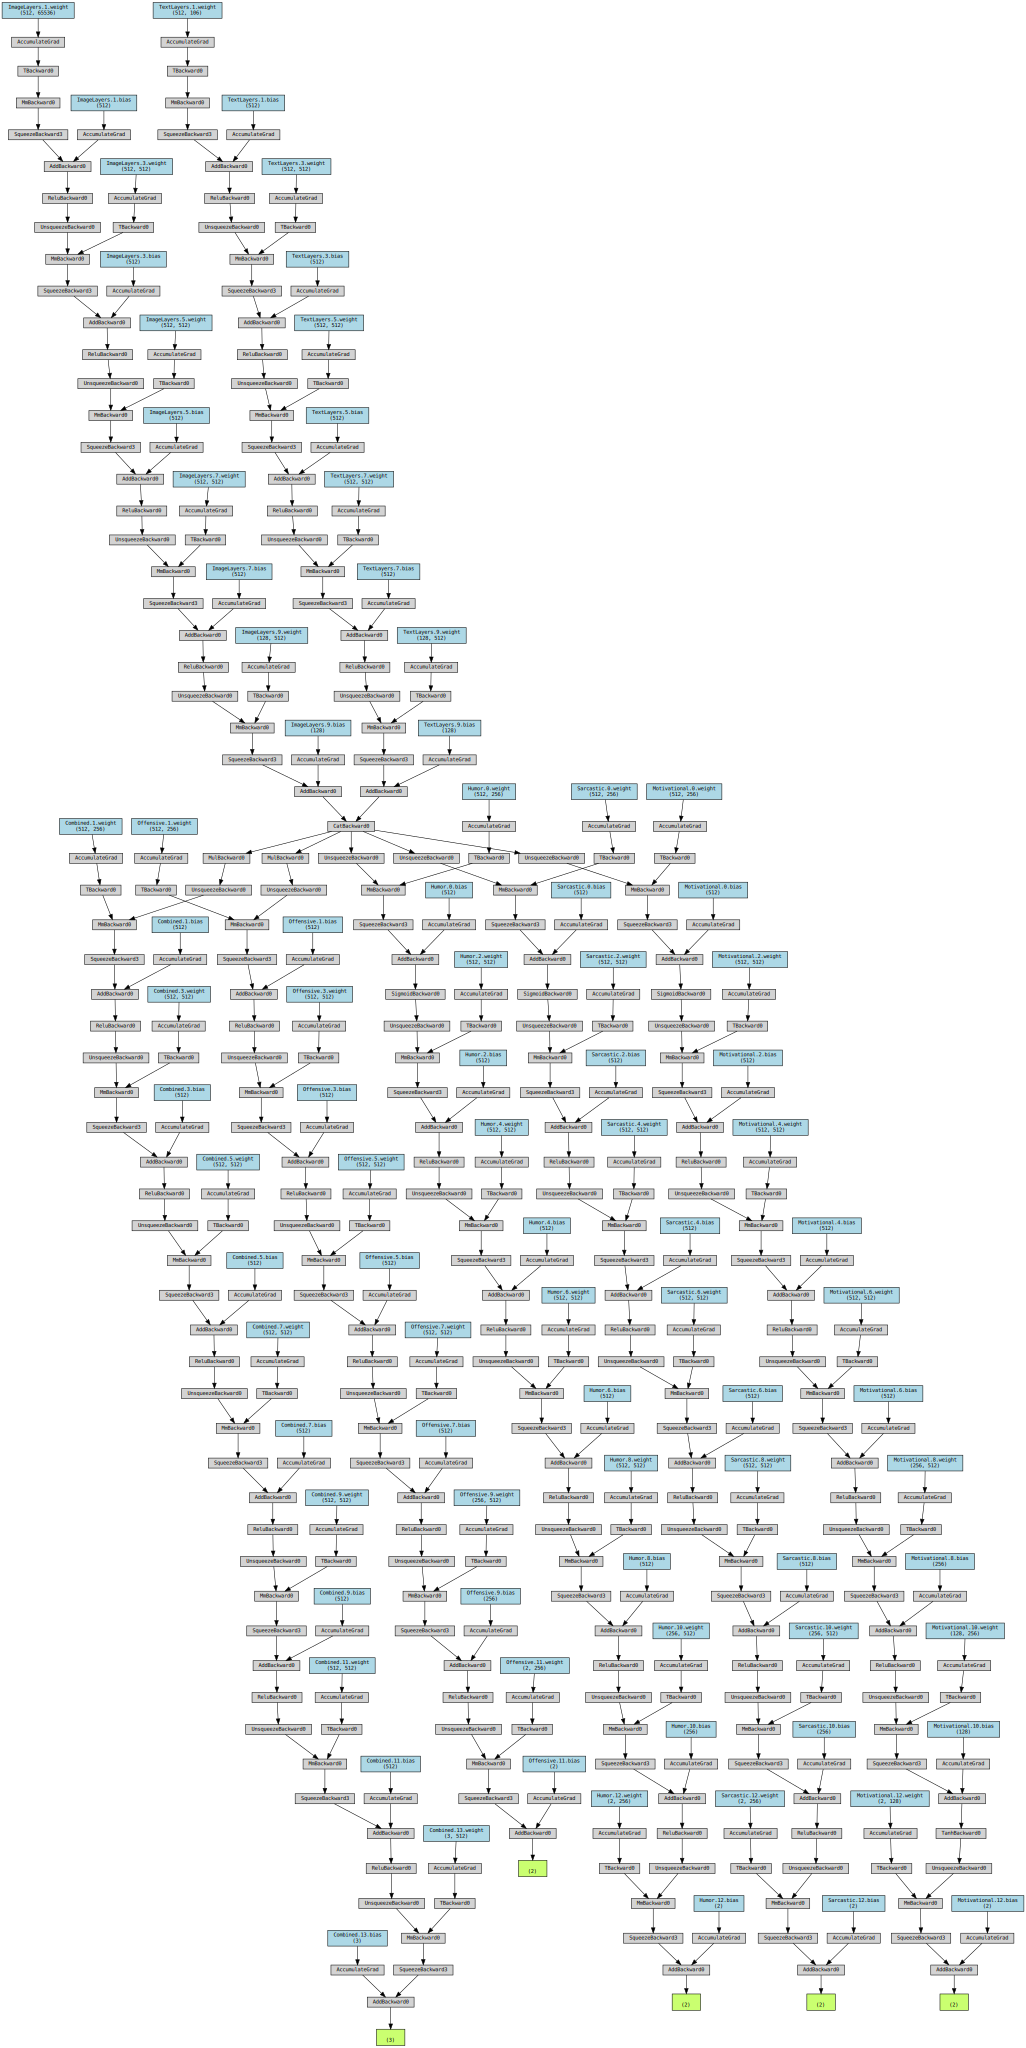

In [ ]:
make_dot(clf(im, t), params=dict(clf.named_parameters()))

RETURN IMAGE TEXT AND LABLE WHEN INDEX IS PASSED

In [46]:
def valreturner1(x):
    image=X_test[x].float()
    text=X_test1[x].float()
    label=y_test[x]
    label0=y_test0[x]
    label1=y_test1[x]
    label2=y_test2[x]
    label3=y_test3[x]

    return image, text, label, label0, label1, label2, label3

In [47]:
import pickle


Saving Pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 

LOADING PICKLE

In [51]:
filename = '/content/drive/MyDrive/finalized_model.sav'
clfs = pickle.load(open(filename, 'rb'))

PREDICTIONS ON TEST DATA


In [52]:
running_loss = 0
correct = 0
correct1 = 0
correct2 = 0
correct3 = 0
correct4 = 0
size=(len(X_test))
for i in range(size):
    im, t, la, la0, la1, la2, la3 = valreturner1(i)
    output, output0, output1, output2, output3 = clfs(im, t)
    if output0.argmax(0) == la0:
        correct1 += 1
    if output1.argmax(0) == la1:
        correct2 += 1
    if output2.argmax(0) == la2:
        correct3 += 1
    if output3.argmax(0) == la3:
        correct4 += 1
print("Offensive Accuracy",correct1/ size)
print("Humor Accuracy",correct2/ size)
print("Sarcastic Accuracy",correct3/ size)
print("Motivational Accuracy",correct4/ size)
print("Overall Accuracy",(correct1+correct2+correct3+correct4)/(size*4))
print('Finished Training')


Offensive Accuracy 0.396370582617001
Humor Accuracy 0.7636103151862464
Sarcastic Accuracy 0.778414517669532
Motivational Accuracy 0.6404011461318052
Overall Accuracy 0.6446991404011462
Finished Training
